<a href="https://colab.research.google.com/github/LuisFelipeOrtolan/QuarentenaDados-Alura/blob/master/Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 1: Python, Pandas e Colab

Importando as Bibliotecas


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Obtendo a base de dados dos filmes do MovieLens


In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeID","titulo","generos"]


Obtendo a base de dados de avaliações do MovieLens


In [0]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioID","filmeID", "nota", "momento"]

Obtendo a média da avaliação de cada filme

In [0]:
notas_medias_por_filme = avaliacoes.groupby("filmeID")["nota"].mean()

Juntando os filmes com a média de avaliação de cada filme!

In [0]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeID")
filmes_com_media.rename(columns = {"nota":"nota_media"}, inplace = True)
filmes_com_media = filmes_com_media.round({'nota_media':2})

Determinando os filmes que não possuem avaliação

In [8]:
filmes_sem_nota = filmes_com_media[filmes_com_media.isnull().any(axis=1)]
filmes_sem_nota

,filmeID,titulo,generos,nota_media
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


Contando quantas avaliações cada filme teve

In [9]:
votos_por_filme = avaliacoes.groupby("filmeID")["nota"].count()
votos_por_filme = votos_por_filme.rename("votos_por_filme")

filmes_com_media_e_votos = filmes_com_media.join(votos_por_filme, on="filmeID")
filmes_com_media_e_votos.head()

,filmeID,titulo,generos,nota_media,votos_por_filme
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


Separando os gêneros do filme

In [0]:
generos = filmes_com_media_e_votos.generos.str.split(pat = '|', expand = True)
generos = generos.apply(pd.value_counts)
generos = generos.sum(axis=1)

Criando um dataframe com as informações coletadas

In [0]:
data = {'Generos':generos.index, 'Vezes_citados':generos}
df_generos = pd.DataFrame(data)
df_generos = df_generos.reset_index()
df_generos.drop(columns = ['index'], inplace = True)

Mostrando os gêneros

In [12]:
print(df_generos['Generos'])

0     (no genres listed)
1                 Action
2              Adventure
3              Animation
4               Children
5                 Comedy
6                  Crime
7            Documentary
8                  Drama
9                Fantasy
10             Film-Noir
11                Horror
12                  IMAX
13               Musical
14               Mystery
15               Romance
16                Sci-Fi
17              Thriller
18                   War
19               Western
Name: Generos, dtype: object


Mostrando o número de filmes que cada um foi classificado

In [13]:
print(df_generos)

               Generos  Vezes_citados
0   (no genres listed)           34.0
1               Action         1828.0
2            Adventure         1263.0
3            Animation          611.0
4             Children          664.0
5               Comedy         3756.0
6                Crime         1199.0
7          Documentary          440.0
8                Drama         4361.0
9              Fantasy          779.0
10           Film-Noir           87.0
11              Horror          978.0
12                IMAX          158.0
13             Musical          334.0
14             Mystery          573.0
15             Romance         1596.0
16              Sci-Fi          980.0
17            Thriller         1894.0
18                 War          382.0
19             Western          167.0


Plotando os gêneros e número de vezes listados

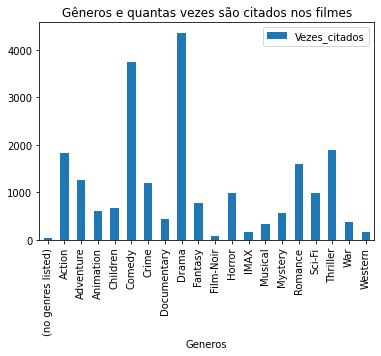

In [14]:
df_generos.plot(x = 'Generos', y = 'Vezes_citados', kind = 'bar', title = "Gêneros e quantas vezes são citados nos filmes")
plt.show()

## Aula 2: Médias, medianas e visualização de dados

Ordenando os gêneros pelo número de vezes citados e plotando novamente o gráfico

---



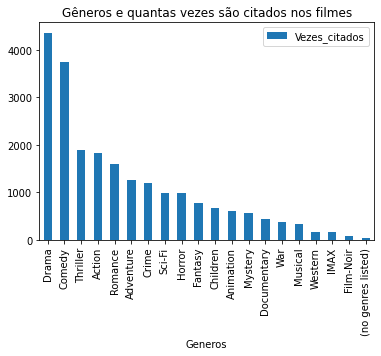

In [15]:
df_generos.sort_values(by = "Vezes_citados", ascending = False, inplace = True)
df_generos.plot(x = 'Generos', y = 'Vezes_citados', kind = 'bar', title = "Gêneros e quantas vezes são citados nos filmes")

Colocando cores graduais no gráfico para melhor visualização e inclinando os xticks em 45 gruas

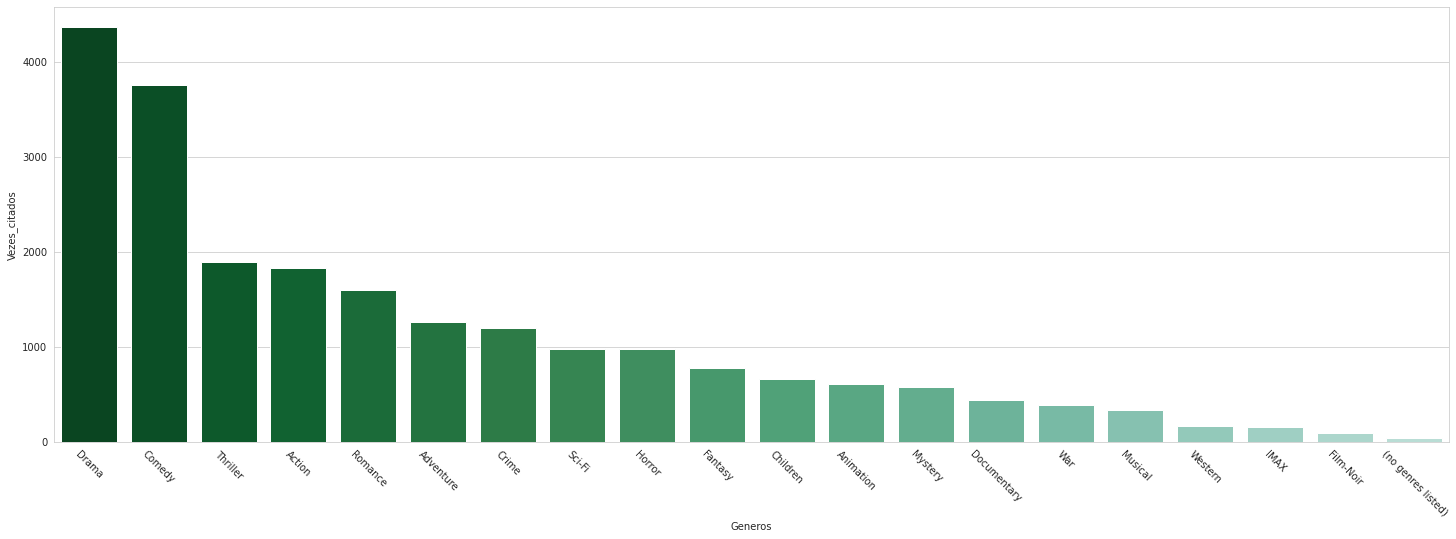

In [83]:
sns.set_style("whitegrid")
plt.figure(figsize=(25,8))
sns.barplot(x=df_generos.Generos, y=df_generos.Vezes_citados, palette=sns.color_palette("BuGn_r", n_colors=len(df_generos.Generos) + 8))
plt.xticks(rotation= -45)
plt.show()

Criando uma função que plota gráficos do tipo histograma e boxplot para as notas de um filme

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeID=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()

Encontrando filmes com notas médias semelhantes

In [29]:
filmes_com_media.query("nota_media == 3.27")

,filmeID,titulo,generos,nota_media
2847,3809,What About Bob? (1991),Comedy,3.27
3790,5299,My Big Fat Greek Wedding (2002),Comedy|Romance,3.27
300,342,Muriel's Wedding (1994),Comedy,3.27
1807,2407,Cocoon (1985),Comedy|Sci-Fi,3.27
649,837,Matilda (1996),Children|Comedy|Fantasy,3.27
5256,8623,Roxanne (1987),Comedy|Romance,3.27
2032,2707,Arlington Road (1999),Thriller,3.27
1840,2447,Varsity Blues (1999),Comedy|Drama,3.27
2766,3704,Mad Max Beyond Thunderdome (1985),Action|Adventure|Sci-Fi,3.27
2089,2779,Heaven Can Wait (1978),Comedy,3.27


Comparando filmes com média igual e distribuições diferentes usando a função plot_filme()

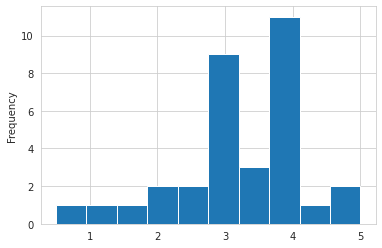

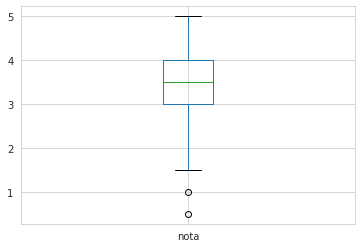

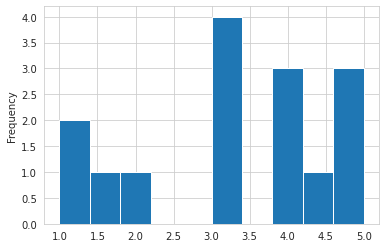

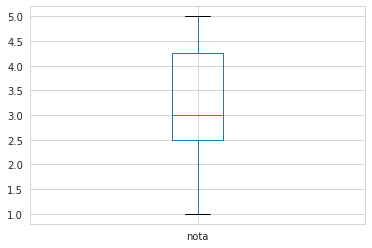

In [32]:
plot_filme(342)
plot_filme(535)

Tanto as distribuições quanto os box-plots são bem diferentes. O box-plot do filme 342 indica que(removendo os outliers) o máximo e o mínimo está contido entre 1.5 e 5 enquanto o do filme 535 está contido entre 1 e 5, além de 50% dos dados estar muito mais concentrado no primeiro filme do que no segundo. 

Criando o box-plot dos dez filmes com mais votos

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


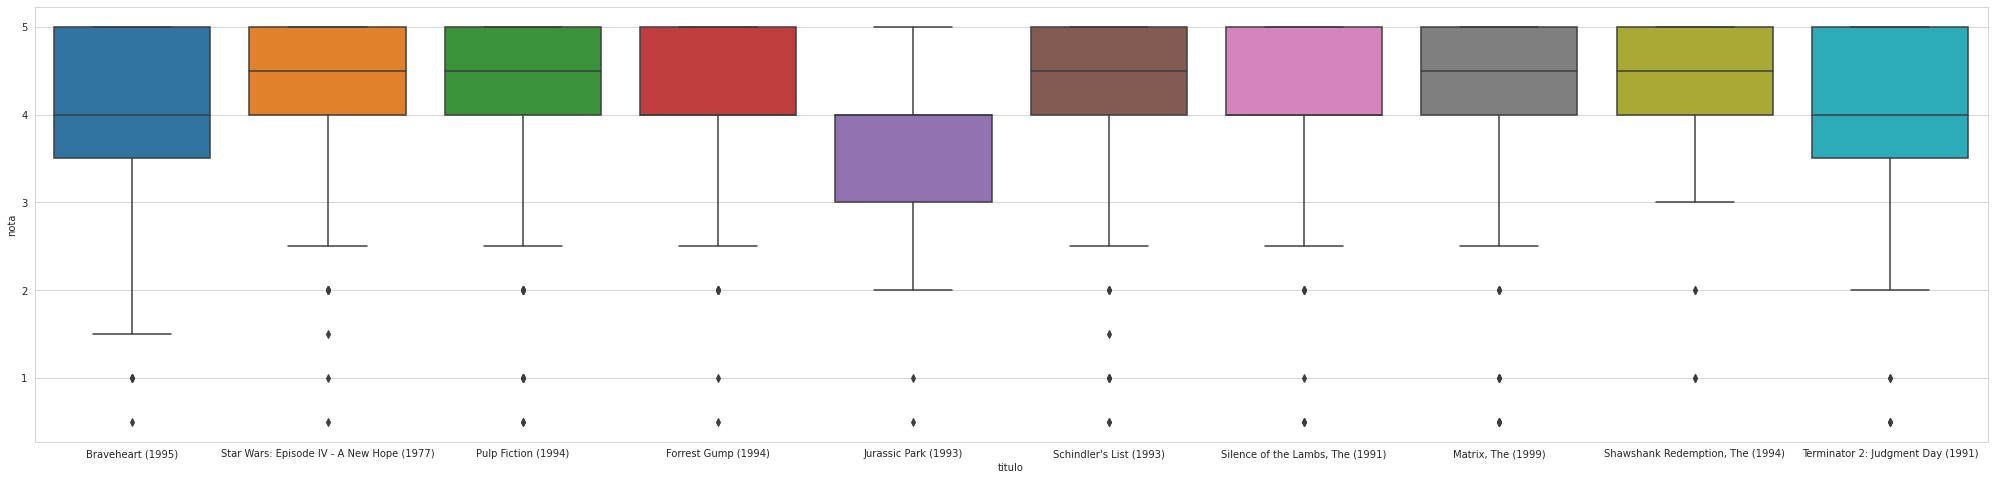

In [137]:
#Encontrando os 10 filmes com maior quantidade de votos.
ids_mais_votados = filmes_com_media_e_votos.sort_values(by = "votos_por_filme", ascending = False).head(10).filmeID

#Preparando para juntar as avaliações com os nomes dos filmes.
mais_votados = avaliacoes.query("filmeID in @ids_mais_votados")
nomes_filmes = filmes.query("filmeID in @ids_mais_votados")

#Removendo colunas que não serão usadas.
mais_votados = mais_votados.drop(columns = ["usuarioID", "momento"])
nomes_filmes.drop(columns = ["generos"], inplace=True)

#Juntando as colunas
filmes_mais_votados = mais_votados.merge(nomes_filmes, on="filmeID")

#Plotando o gráfico
plt.figure(figsize=(35,8))
sns.boxplot(data = filmes_mais_votados, x ="titulo", y="nota")
plt.show()

É possível ver que a maioria dos filmes envolvem em seu 50% dos votos as notas 4 e 5. Isso provavelmente indica que as pessoas fazem realmente questão de ir votar em filmes que elas acharam de qualidade excelente.

Calculando mediana e moda dos filmes

In [155]:
notas_mediana = avaliacoes.groupby("filmeID")["nota"].median()
notas_moda = avaliacoes.groupby("filmeID")["nota"].agg(pd.Series.mode)

filmes_e_dados = filmes_com_media.join(notas_mediana, on = "filmeID").sort_index()
filmes_e_dados.rename(columns = {"nota":"mediana"}, inplace = True)

filmes_e_dados = filmes_e_dados.join(notas_moda, on = "filmeID")
filmes_e_dados.rename(columns = {"nota":"moda"}, inplace = True)

,filmeID,titulo,generos,nota_media,mediana,moda
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,4.0,4
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,3.5,4
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,3.0,3
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,3.0,3
4,5,Father of the Bride Part II (1995),Comedy,3.07,3.0,3
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,4.0,4
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,3.5,3.5
9739,193585,Flint (2017),Drama,3.50,3.5,3.5
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,3.5,3.5
